# Impacts of Demographic Factors on Math Performance
#### UBC STAT 201 - Group 25

<span style="color:blue">some *blue* text</span>.

## Introduction

<span style="color:blue">The instructions for this section are the same in your proposal. 
Just be sure to improve this section by incorporating feedback, and changing things based on your own improved understanding of the project 
(now that more time has passed since the proposal).
</span>.

In this report, we investigate the potential impacts of parental education levels on student secondary school mathematics performance. In particular, we explore the differences in students' mean final math grades across groups with highly educated parents, and parents with less formal education. 

Previous research has indicated that several family/household factors have impacts on general educational outcomes (Marks 2006). Students from single parent households in Finland were found to be at higher risk of educational underachievement, and students from larger families in the USA had less favourable educational outcomes (Riala et al., 2003; Blake, 1989). Parental education levels have also been shown to be predictive of child success later in life (Dubow et al., 2009). In this report, we investigate how these factors may impact mathematical performance specifically.

We will use inferential statistical techniques (computing confidence intervals using both CLT and bootstrapping) to determine whether there is significant evidence of a difference in mean math grades between students with more/less formally educated parents. The mean and standard deviation of the response variable G3 (final grade in mathematics) will be important when calculating confidence intervals for the difference in means. We consider the sample size to be large enough (395 observations) to apply the CLT in our calculation of confidence intervals.

The data we are using was collected by Paulo Cortez and Alice Silva from secondary schools in Portugal. Their original paper, with detailed explanations of the sampling process can be found [here](https://www.researchgate.net/publication/228780408_Using_data_mining_to_predict_secondary_school_student_performance). The dataset can be downloaded from the UC Irvine Machine learning repository [here](https://archive.ics.uci.edu/dataset/320/student+performance).

**Variables of Interest**
* `G3`: final grade in mathematics course, numeric [0, 20] (Portugal, France and several other European countries use the 20 point scale)
* `Medu`: mother's education level, factor with 4 levels [0 - none, 1 - primary (4th grade), 2 - 5th to 9th grade, 3 - secondary, 4 - higher education]
* `Fedu`: father's education level, factor with 4 levels (same as Medu)

We will be aggregating each of `Medu` and `Fedu` into 2 level factors (binary) in order to carry out our hypothesis tests. Levels 0-2 will be grouped into a "low education" group, and levels 3-4 create the "high education" group.

**Inferential Research Questions**

Let $\mu_{f-lo}$, $\mu_{f-hi}$ be the mean final mathematics grade of students with fathers in the low and high education groups respectively. Likewise, let $\mu_{m-lo}$, $\mu_{m-hi}$ be the mean final mathematics grade of students with mothers in the low and high education groups respectively. Our 2 hypothesis tests are as follows:

**Test 1: Mothers' Education Level**

* $H_0$: $\mu_{m-lo}$ = $\mu_{m-hi}$
* $H_A$: $\mu_{m-lo}$ < $\mu_{m-hi}$

**Test 2: Fathers' Education Level**

* $H_0$: $\mu_{f-lo}$ = $\mu_{f-hi}$
* $H_A$: $\mu_{f-lo}$ < $\mu_{f-hi}$

Both hypothesis tests will be carried out at the $\alpha$ = 0.05 significance level.<br>
<span style="color:red">NOTE: we may need to adjust significance level for doing multiple tests</span>


## Methods & Results

<span style="color:blue">
Here is where you’ll include your work from the “Preliminary Results” in your proposal, 
along with the additional results you planned to conduct, 
as indicated in the “Methods: Plan” section of your proposal. 
Be sure to incorporate feedback from the teaching team and your peers (as relevant), 
or make any improvements based on your own improved understanding of the project 
(now that more time has passed since the proposal).



Specifically, in addition to what is requested in the “Preliminary Results” section of the proposal, w
e are looking for the following components:

- Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
        Make sure to interpret the results you obtain. It’s not enough to just state what a 90% confidence interval is, for example.
- Ensure your tables and/or figures are labeled with a figure/table number.
- Do you think one of bootstrapping or asymptotics is more appropriate than the other? Why or why not? Explain why you think both methods gave you similar/different results, and whether you think one is more trustworthy than the other.
</span>

In [1]:
library(tidyverse)
library(dplyr)
library(gridExtra)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
students <- read.csv("https://raw.githubusercontent.com/aidanmeharg/STAT_201_Project/main/student-mat.csv", sep = ";")

head(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [3]:
# check for missing values
students %>%
    summarize(num_rows_na = sum(rowSums(is.na(.)) > 0))

num_rows_na
<int>
0


There are no missing values in the dataset.

Dataset after selecting for variables of interest:

In [4]:
students_filtered <- students |> select(G3, Medu, Fedu)
head(students_filtered)

,G3,Medu,Fedu
,<int>,<int>,<int>
1,6,4,4
2,6,1,1
3,10,1,1
4,15,4,2
5,10,3,3
6,15,4,3


mean,sd
<dbl>,<dbl>
10.41519,4.581443


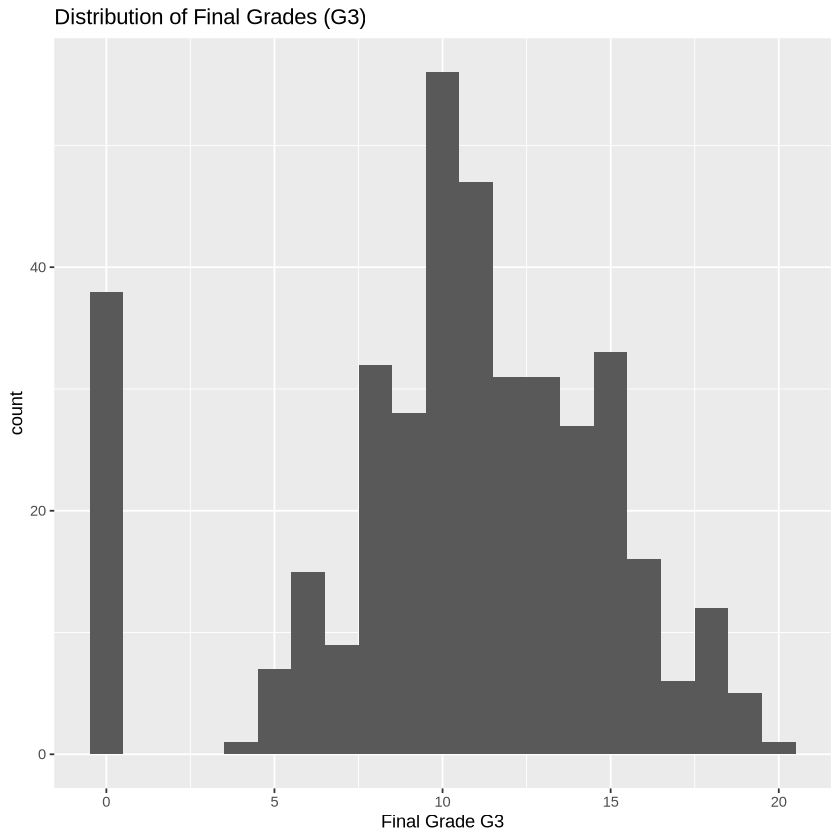

In [5]:
ggplot(students, aes(x = G3)) +
    geom_histogram(binwidth = 1) +
    xlab("Final Grade G3") +
    ggtitle("Distribution of Final Grades (G3)")

students |>
    summarize(mean = mean(G3), sd = sd(G3))

This distribution is largely normal and seems to be centered around 10. We note that there are a large number of students who received a final grade of zero. In the future we may decide to drop these observations, as they likely represent a student "dropping-out" of school as opposed to actually performing poorly in assessments. The mean of the students' final grades is 10.42 out of 20, and the standard deviation for this sample is 4.58.

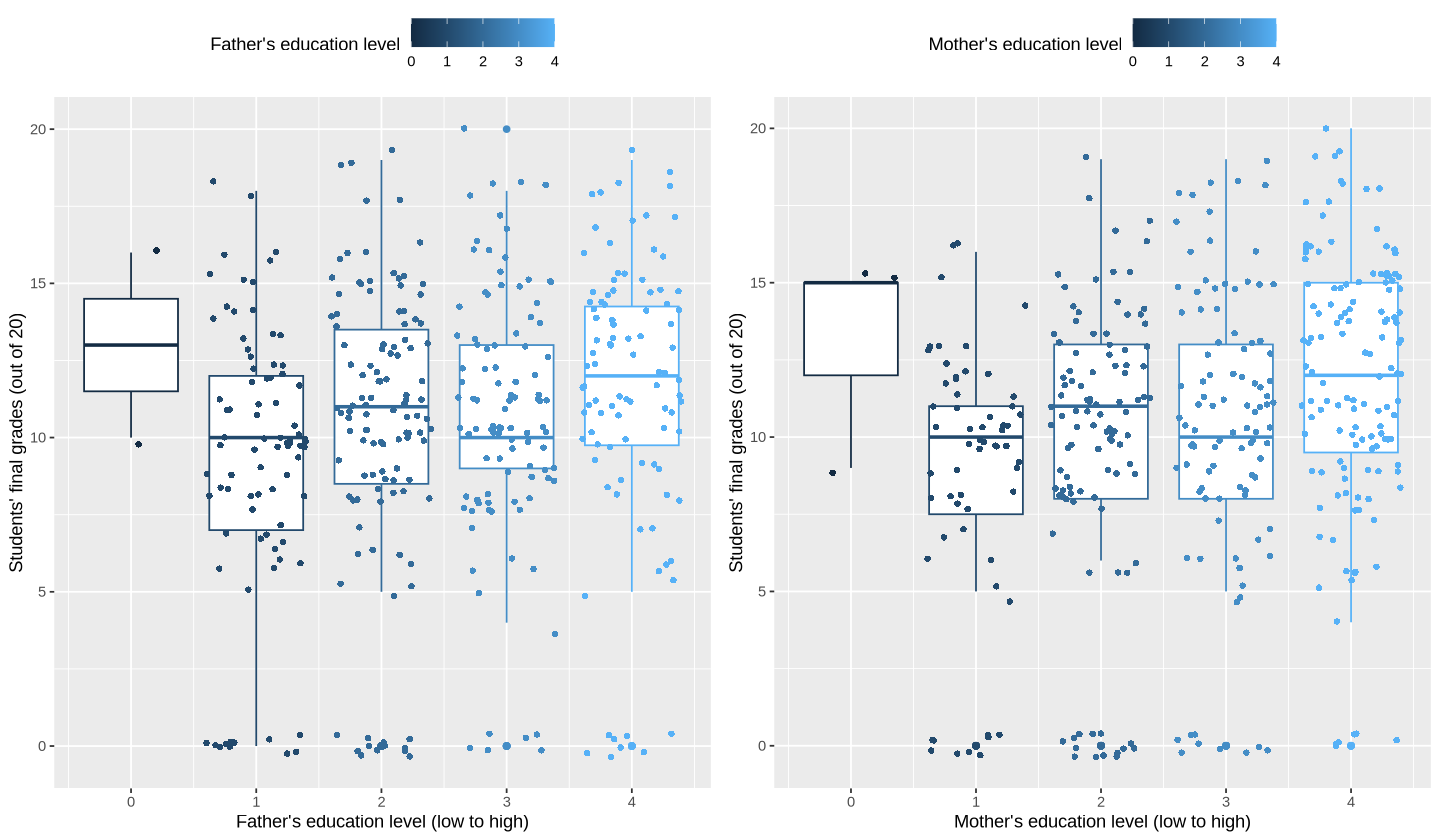

In [6]:
options(repr.plot.width = 12)
plots_medu_fedu <- list()

plots_medu_fedu[[1]] <- students |>
                            ggplot(aes(x = Fedu, y = G3, group = Fedu, color = Fedu)) +
                            geom_boxplot() +
                            geom_jitter(shape = 16) +
                            theme(legend.position = "top") +
                            xlab("Father's education level (low to high)") +
                            ylab("Students' final grades (out of 20)") +
                            labs(color = "Father's education level")

plots_medu_fedu[[2]] <- students |>
                            ggplot(aes(x = Medu, y = G3, group = Medu, color = Medu)) +
                            geom_boxplot() +
                            geom_jitter(shape = 16) +
                            theme(legend.position = "top") +
                            xlab("Mother's education level (low to high)") +
                            ylab("Students' final grades (out of 20)") +
                            labs(color = "Mother's education level")

grid.arrange(grobs = plots_medu_fedu, ncol = 2)

**IMPORTANT**: in order to compare student performance across low and high parental education levels, we will aggregate the parental education variables (`Medu` and `Fedu`) into binary variables. `Medu` will become `hi_medu` which takes the value of `TRUE` when a mother has received secondary education or higher (3-4), and `FALSE` for mothers with no education up to 9th grade (0-2). The same aggregation is performed for fathers education (`Fedu`).

In [7]:
students_filtered <- students |> mutate(Medu = ifelse(Medu > 2, TRUE, FALSE), 
                               Fedu = ifelse(Fedu > 2, TRUE, FALSE)) |>
            select(G3, hi_medu = Medu, hi_fedu = Fedu)

In [8]:
# show counts + mean grades in each aggregated category
students_filtered |> group_by(hi_fedu) |> summarize(count = n(), mean_g3 = mean(G3)) 

students_filtered |> group_by(hi_medu) |> summarize(count = n(), mean_g3 = mean(G3)) 

hi_fedu,count,mean_g3
<lgl>,<int>,<dbl>
FALSE,199,9.834171
TRUE,196,11.005102


hi_medu,count,mean_g3
<lgl>,<int>,<dbl>
FALSE,165,9.412121
TRUE,230,11.134783


There are an adequate number of observations in each of the 4 groups we will be studying (no severe class imbalances, and enough to apply the CLT in our hypothesis tests). The sample mean grade of students with more educated mothers is higher than those with less educated mothers. The same is true for the sample mean grade of students with more educated fathers as well. These results are visualized with boxplots below:

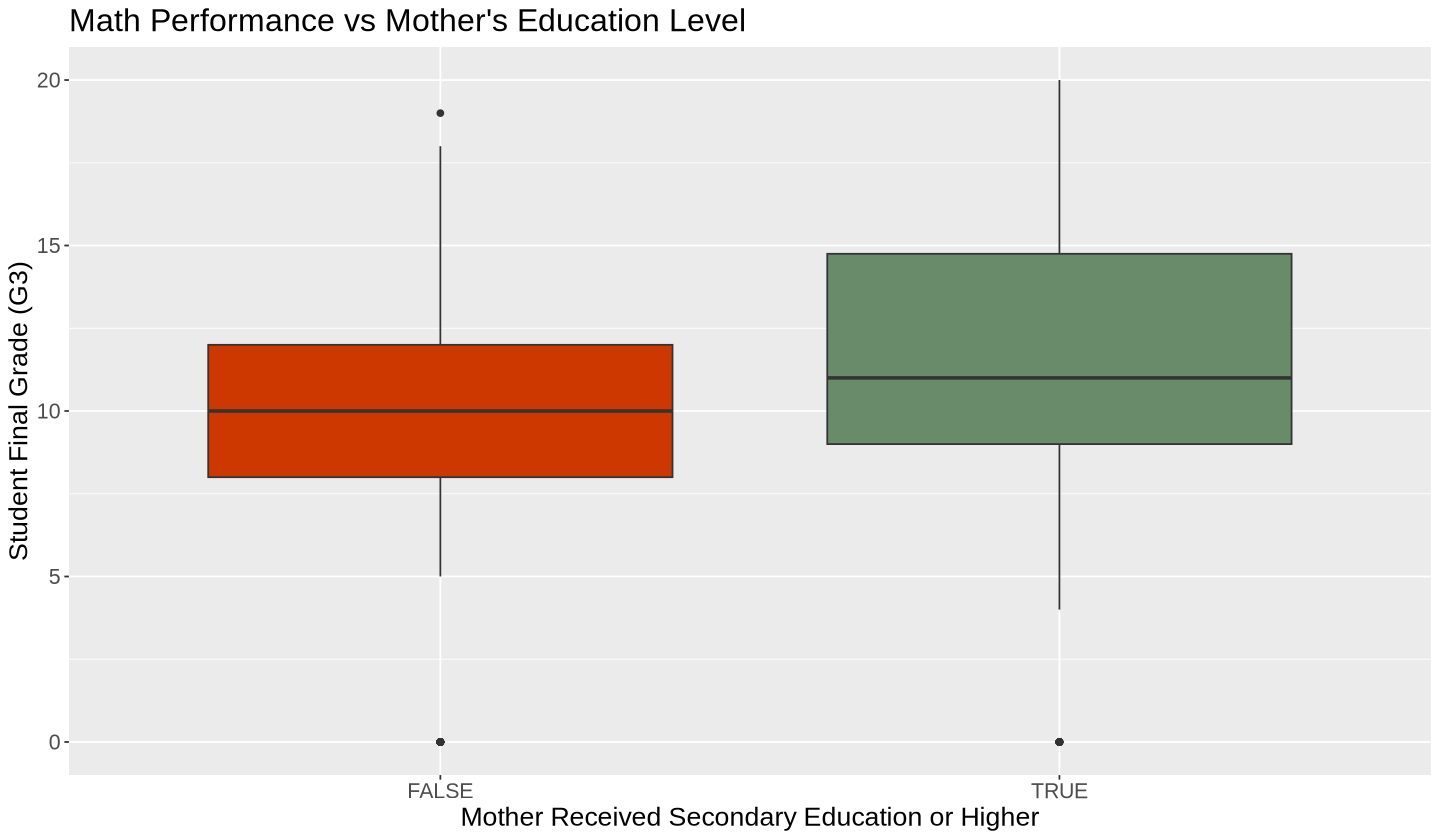

In [9]:
ggplot(students_filtered, aes(hi_medu, G3)) +
    geom_boxplot(fill = c("orangered3", "darkseagreen4")) +
    labs(x = "Mother Received Secondary Education or Higher", y = "Student Final Grade (G3)") +
    ggtitle("Math Performance vs Mother's Education Level") +
    theme(text = element_text(size = 16))

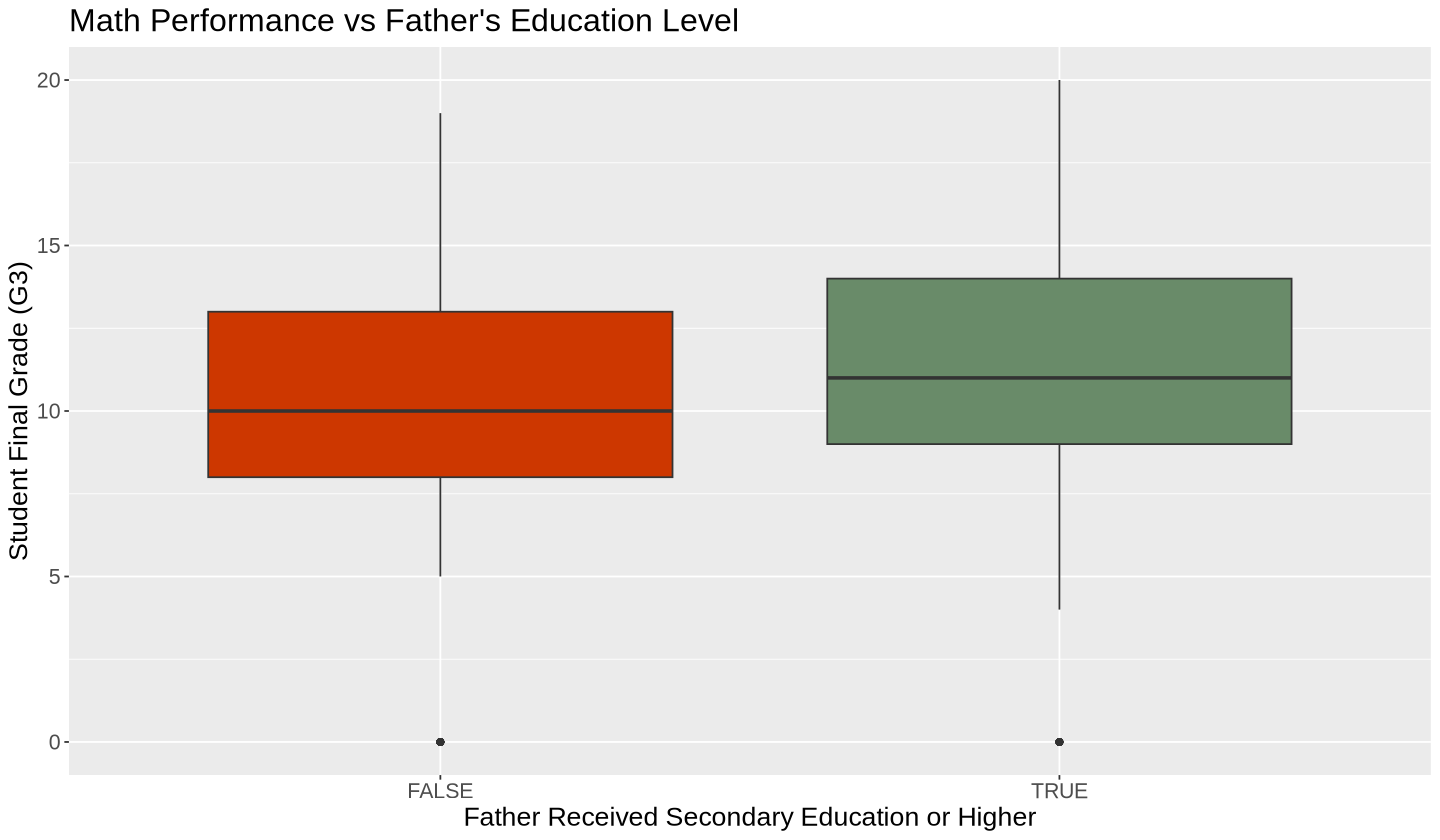

In [34]:
ggplot(students_filtered, aes(hi_fedu, G3)) +
    geom_boxplot(fill = c("orangered3", "darkseagreen4")) +
    labs(x = "Father Received Secondary Education or Higher", y = "Student Final Grade (G3)") +
    ggtitle("Math Performance vs Father's Education Level") +
    theme(text = element_text(size = 16))

Although the above tables and graphs indicate that the sample mean grades of students with more educated parents are higher, we cannot make any statements about the differences in population parameters given this information alone. We need to obtain the statistical significance of these differences, and use confidence intervals to communicate our inference about the differences in true population parameters of interest:  $\mu_{f-lo}$, $\mu_{f-hi}$, $\mu_{m-lo}$,  and $\mu_{m-hi}$

### Test 1: Mothers' Education Level

<span style="color:blue">Please carry out one sided hypothesis test for difference in means using both CLT and bootstrap approaches</span>

In [35]:
mother_summary <- students_filtered |> group_by(hi_medu) |> summarize(count = n(), mean_g3 = mean(G3), sd = sd(G3)) 

mean_low <- filter(mother_summary, hi_medu == FALSE)$mean_g3
sd_low <- filter(mother_summary, hi_medu == FALSE)$sd
n_low <- filter(mother_summary, hi_medu == FALSE)$count

mean_high <- filter(mother_summary, hi_medu == TRUE)$mean_g3
sd_high <- filter(mother_summary, hi_medu == TRUE)$sd
n_high <- filter(mother_summary, hi_medu == TRUE)$count

z_score <- qnorm(0.975) # For a 95% CI
ci_low <- c(mean_low - z_score * sd_low / sqrt(n_low), mean_low + z_score * sd_low / sqrt(n_low))
ci_high <- c(mean_high - z_score * sd_high / sqrt(n_high), mean_high + z_score * sd_high / sqrt(n_high))

t_test_result <- t.test(filter(students_filtered, hi_medu == TRUE)$G3, filter(students_filtered, hi_medu == FALSE)$G3, alternative = "greater")
t_test_result


	Welch Two Sample t-test

data:  filter(students_filtered, hi_medu == TRUE)$G3 and filter(students_filtered, hi_medu == FALSE)$G3
t = 3.735, df = 349.63, p-value = 0.0001096
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.9619959       Inf
sample estimates:
mean of x mean of y 
11.134783  9.412121 


Using a 5% significancce level, we reject the null hypohesis.

### Test 2: Fathers' Education Level

<span style="color:blue">We can essentially copy over all code from test 1</span>

In [36]:
father_summary <- students_filtered |> group_by(hi_fedu) |> summarize(count = n(), mean_g3 = mean(G3), sd = sd(G3)) 

mean_low <- filter(father_summary, hi_fedu == FALSE)$mean_g3
sd_low <- filter(father_summary, hi_fedu == FALSE)$sd
n_low <- filter(father_summary, hi_fedu == FALSE)$count

mean_high <- filter(father_summary, hi_fedu == TRUE)$mean_g3
sd_high <- filter(father_summary, hi_fedu == TRUE)$sd
n_high <- filter(father_summary, hi_fedu == TRUE)$count

z_score <- qnorm(0.975) # For a 95% CI
ci_low <- c(mean_low - z_score * sd_low / sqrt(n_low), mean_low + z_score * sd_low / sqrt(n_low))
ci_high <- c(mean_high - z_score * sd_high / sqrt(n_high), mean_high + z_score * sd_high / sqrt(n_high))

t_test_result <- t.test(filter(students_filtered, hi_fedu == TRUE)$G3, filter(students_filtered, hi_fedu == FALSE)$G3, alternative = "greater")
t_test_result


	Welch Two Sample t-test

data:  filter(students_filtered, hi_fedu == TRUE)$G3 and filter(students_filtered, hi_fedu == FALSE)$G3
t = 2.5587, df = 392.25, p-value = 0.005441
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.4164068       Inf
sample estimates:
mean of x mean of y 
11.005102  9.834171 


Using a 5% significancce level, we reject the null hypohesis.

## Methods

Our report is trustworthy because we use data from a source that has been cited five publications. Because our sample size is so large (395), we will be able to apply the CLT. 

Currently, our plots and estimates aren't enough to give a stakeholder because, while we have been able to visualize differences, we don't have the statistical significance of those differences or how they interact with each other.

To produce reliable results, we would need to perform hypothesis tests and produce a confidence interval. We are interested in how math grades vary depending on the education levels of the students' parents, so our null hypothesis will be $H_0$ = there is no relationship between the mother's education level (Medu) or the father's education level (Fedu) and the students' final math grades (G3). Our alternative hypothesis $H_A$ = there is a positive relationship between Medu or Fedu and G3.

Our expected result is the null hypothesis $H_0$. Finding factors affecting differences in academic performance could allow educators to better acommodate and support these students and their learning, as well as incentivize institutions to allocate resources to help disadvantaged groups.

## Discussion

<span style="color:blue">
In this section, you’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.

- Summarize what you found, and the implications/impact of your findings.
- If relevant, discuss whether your results were what you expected to find.
- Discuss future questions/research this study could lead to.
</span>.

Our project explored the influence of parental education levels on the mathematical achievements of secondary school students. Utilizing data collected by Paulo Cortez and Alice Silva from Portuguese secondary schools, our analysis revealed a complex relationship between students' academic performance in mathematics and their parents' educational backgrounds. We found that students whose parents have higher levels of education generally achieve better math grades. This finding supports the hypothesis that parental education significantly affects children's academic outcomes, resonating with the findings of Dubow et al. (2009) and Marks (2006), who noted the strong predictive value of parental education for long-term success.

The implications of our study extend beyond academic performance, highlighting the need for policy interventions to support students from less educated backgrounds and reduce educational inequities. Additionally, our research underscores the importance of considering family socio-economic contexts in educational planning and resource allocation.

Future research could expand on our findings by exploring the broader impacts of parental education levels on children's overall development, both academically and socially, and by examining data from different regions to determine the universality of our findings.

In conclusion, our project reinforces the link between parental education and student academic performance, particularly in mathematics, and calls for policies that promote equity and inclusivity in education.

## References

Blake, J. (1989). Family size and achievement (studies in demography). University of California Press.

Cortez, Paulo & Silva, Alice. (2008). Using data mining to predict secondary school student performance. EUROSIS. 

Dubow, E. F., Boxer, P., &amp; Huesmann, L. R. (2009). Long-term effects of parents’ education on Children’s educational and occupational success: Mediation by family interactions, child aggression, and teenage aspirations. Merrill-Palmer Quarterly, 55(3), 224–249. https://doi.org/10.1353/mpq.0.0030

Marks, G. N. (2006). Family size, family type and student achievement: Cross-national differences and the role of socioeconomic and school factors. Journal of Comparative Family Studies, 37(1), 1–24. https://doi.org/10.3138/jcfs.37.1.1

Riala, K., Isohanni, I., Jokelainen, J., Jones, P. B., &amp; Isohanni, M. (2003). The Relationship between Childhood Family Background and Educational Performance, with Special Reference to Single-parent Families: A Longitudinal Study. Social Psychology of Education, 6(4), 349–365. https://doi.org/10.1023/a:1025608401292 